In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("Advertising.csv")

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
X = df[['TV', 'radio','newspaper']]
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
y = df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [14]:
# Add Constant for intercept.
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.58e-96
Time:                        14:12:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [17]:
residuals = model.resid
residuals

0      1.576026
1     -1.937855
2     -3.007671
3      0.902170
4     -0.288672
         ...   
195    2.229658
196    1.534688
197    0.014079
198    1.732679
199   -1.773196
Length: 200, dtype: float64

In [19]:
fitted_vals = model.fittedvalues
fitted_vals

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
         ...    
195     5.370342
196     8.165312
197    12.785921
198    23.767321
199    15.173196
Length: 200, dtype: float64

`1. Linearity Test`

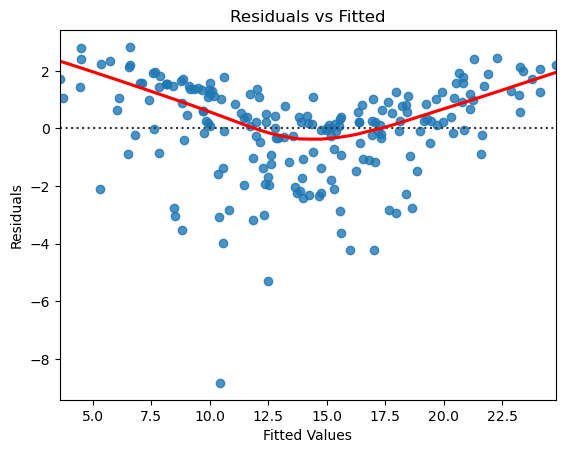

In [20]:
# Residual vs Fitted Plot
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

`2. Normality of Residuals`

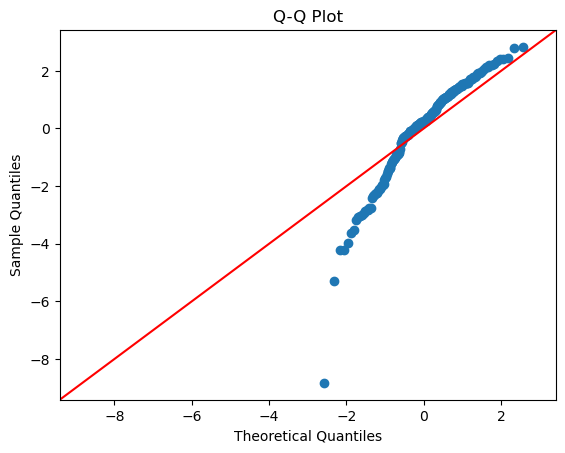

Shapiro-Wilk Test: ShapiroResult(statistic=0.9176652036187541, pvalue=3.938571556266827e-09)


In [21]:
# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot")
plt.show()

# Shapiro-Wilk test
from scipy.stats import shapiro
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk Test:", shapiro_test)

`3. Homoscedasticity (Constant Variance of Errors)`

In [22]:
# Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, model.model.exog)
print('Breusch-Pagan p-value:', bp_test[1])

Breusch-Pagan p-value: 0.16232215845413245


`No Autocorrelation`

Residuals should not be correlated with each other (especially in time series).

In [23]:
# Already in model summary
print("Durbin-Watson:", model.dw)

# Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.show()

AttributeError: 'OLSResults' object has no attribute 'dw'

`5. Multicollinearity`

In [24]:
# Calculate VIF
vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)

     Feature       VIF
0         TV  2.486772
1      radio  3.285462
2  newspaper  3.055245


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

def check_linear_regression_assumptions(X, y):
    # Add constant for intercept
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    
    print("\n===== MODEL SUMMARY =====")
    print(model.summary())
    
    residuals = model.resid
    fitted_vals = model.fittedvalues
    
    # --- Linearity ---
    print("\n✅ 1. Linearity Test (Residuals vs Fitted):")
    sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title("Linearity Check")
    plt.show()

    # --- Normality ---
    print("\n✅ 2. Normality Test (Q-Q Plot & Shapiro-Wilk):")
    sm.qqplot(residuals, line='45')
    plt.title("Q-Q Plot for Normality")
    plt.show()
    
    stat, p = shapiro(residuals)
    print(f"Shapiro-Wilk p-value: {p:.4f}")
    if p < 0.05:
        print("❌ Residuals are NOT normally distributed. Consider log/sqrt transformation of target.")
    else:
        print("✅ Residuals are normally distributed.")
    
    # --- Homoscedasticity ---
    print("\n✅ 3. Homoscedasticity Test (Breusch-Pagan):")
    bp_test = het_breuschpagan(residuals, X_const)
    print(f"Breusch-Pagan p-value: {bp_test[1]:.4f}")
    if bp_test[1] < 0.05:
        print("❌ Heteroscedasticity detected. Try log-transforming y or using robust regression.")
    else:
        print("✅ Residuals have constant variance.")
    
    # --- Autocorrelation ---
    print("\n✅ 4. Autocorrelation Test (Durbin-Watson):")
    dw = sm.stats.durbin_watson(residuals)
    print(f"Durbin-Watson Statistic: {dw:.3f}")
    if dw < 1.5 or dw > 2.5:
        print("❌ Autocorrelation may be present. Consider adding lag variables.")
    else:
        print("✅ No autocorrelation detected.")
    
    plot_acf(residuals)
    plt.title("Autocorrelation of Residuals")
    plt.show()
    
    # --- Multicollinearity ---
    print("\n✅ 5. Multicollinearity Check (VIF):")
    vif_df = pd.DataFrame()
    vif_df["Feature"] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_df)
    if vif_df['VIF'].max() > 10:
        print("❌ High multicollinearity detected. Consider removing or combining correlated features.")
    else:
        print("✅ No severe multicollinearity detected.")
    
    return model


===== MODEL SUMMARY =====
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.58e-96
Time:                        14:20:58   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389    

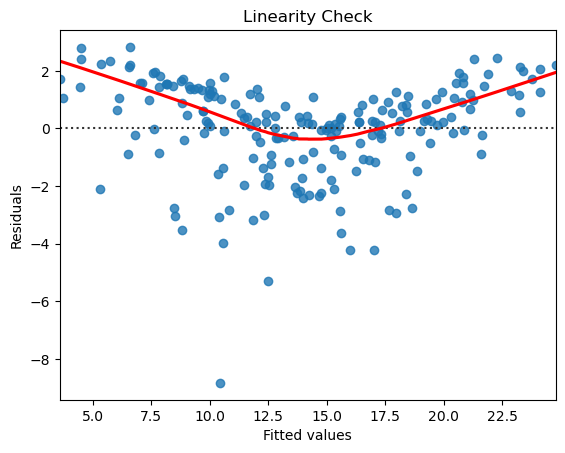


✅ 2. Normality Test (Q-Q Plot & Shapiro-Wilk):


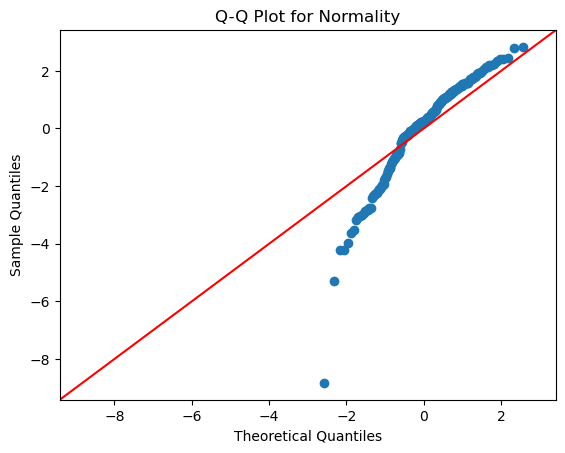

Shapiro-Wilk p-value: 0.0000
❌ Residuals are NOT normally distributed. Consider log/sqrt transformation of target.

✅ 3. Homoscedasticity Test (Breusch-Pagan):
Breusch-Pagan p-value: 0.1623
✅ Residuals have constant variance.

✅ 4. Autocorrelation Test (Durbin-Watson):
Durbin-Watson Statistic: 2.084
✅ No autocorrelation detected.


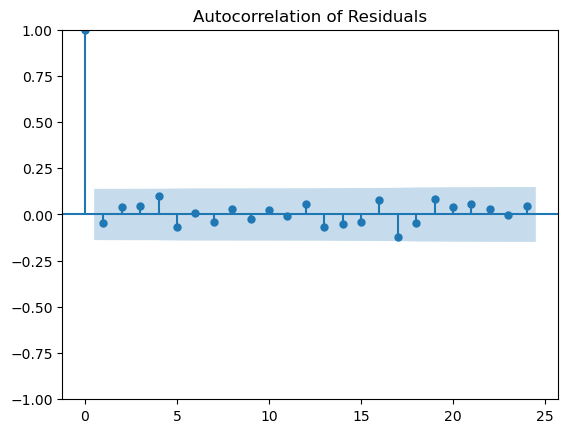


✅ 5. Multicollinearity Check (VIF):
     Feature       VIF
0         TV  2.486772
1      radio  3.285462
2  newspaper  3.055245
✅ No severe multicollinearity detected.


In [31]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

model = check_linear_regression_assumptions(X, y)